#Importando os dados

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('Consumo_cerveja.csv',sep=';')
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [3]:
dados.shape

(365, 7)

#Análise Preliminar

In [4]:
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


Matriz de correlação

In [5]:
dados.corr().round(4) #pearson

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


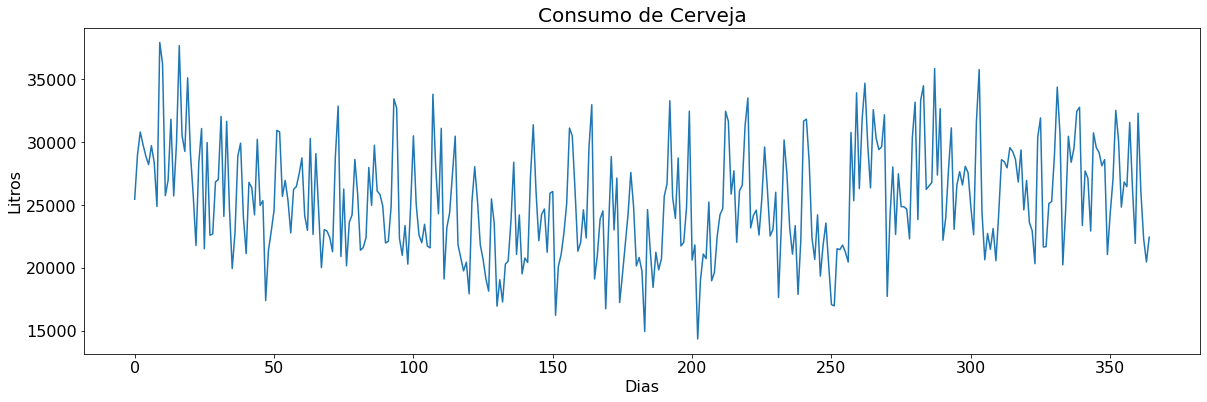

In [6]:
fig, ax = plt.subplots(figsize=(20,6)) #cria varios graficos dentro de uma figura, gera uma tupla com 2 objetos
ax.set_title('Consumo de Cerveja',fontsize=20)
ax.set_ylabel('Litros',fontsize=16)
ax.set_xlabel('Dias',fontsize=16)
ax = dados.consumo.plot(fontsize=16)


Boxplot

In [7]:
import seaborn as sns

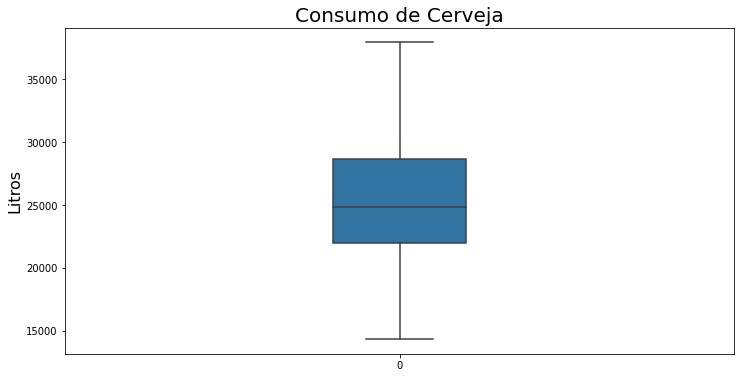

In [8]:
ax = sns.boxplot(data=dados.consumo,orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja',fontsize=20)
ax.set_ylabel('Litros',fontsize=16)
ax

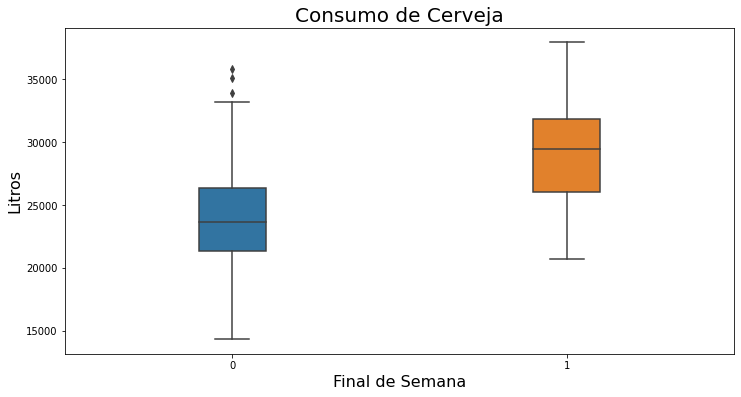

In [9]:
ax = sns.boxplot(y='consumo',x='fds', data=dados,orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja',fontsize=20)
ax.set_ylabel('Litros',fontsize=16)
ax.set_xlabel('Final de Semana',fontsize=16)
ax

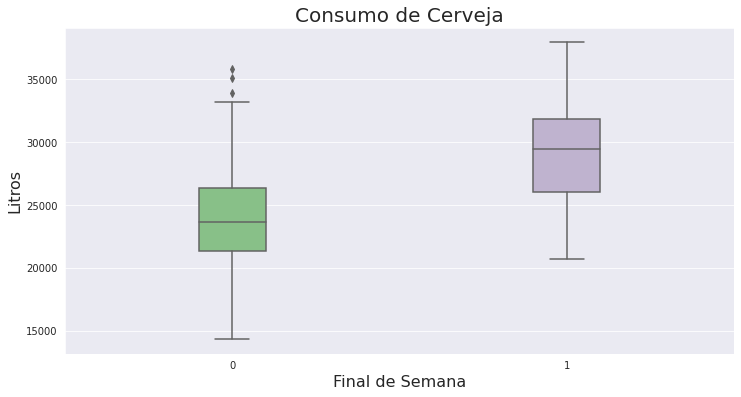

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(y='consumo',x='fds', data=dados,orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja',fontsize=20)
ax.set_ylabel('Litros',fontsize=16)
ax.set_xlabel('Final de Semana',fontsize=16)
ax

Distribuição de Frequências

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


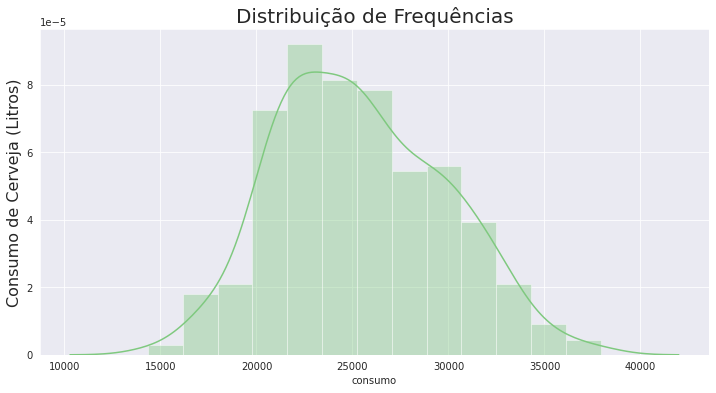

In [11]:
ax =sns.distplot(dados.consumo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências',fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)',fontsize=16)
ax

#Análise de correlação entre as variáveis

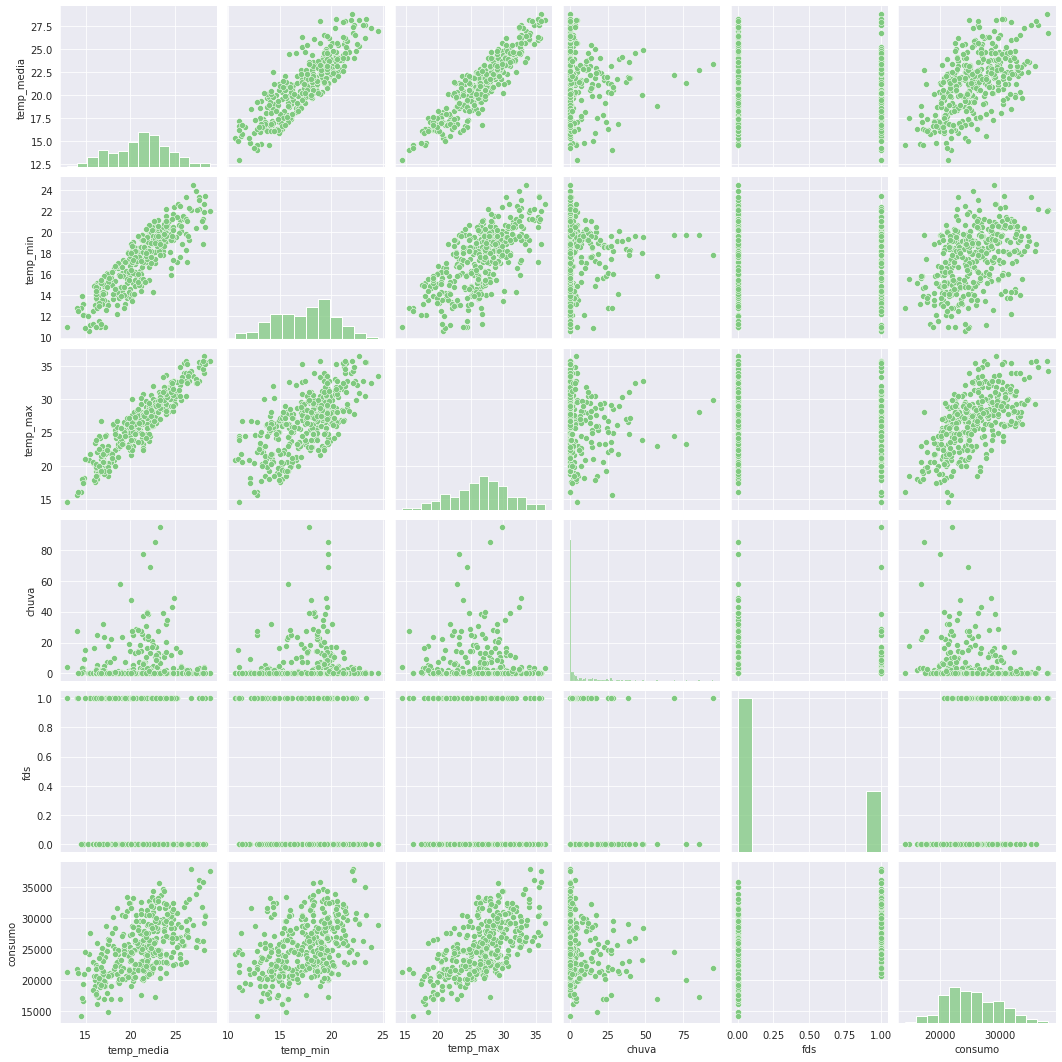

In [12]:
ax = sns.pairplot(dados) #Plot pairwise relationships in a dataset. #matriz de crrelação em forma de grafico scaterplot

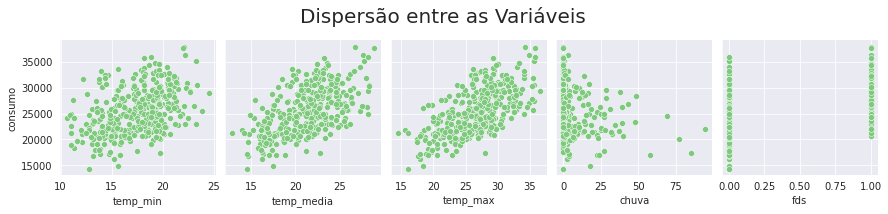

In [13]:
ax = sns.pairplot(dados,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds']) #selecionando apenas uma linha do pairplot
ax.fig.suptitle('Dispersão entre as Variáveis',fontsize=20,y=1.15)
ax

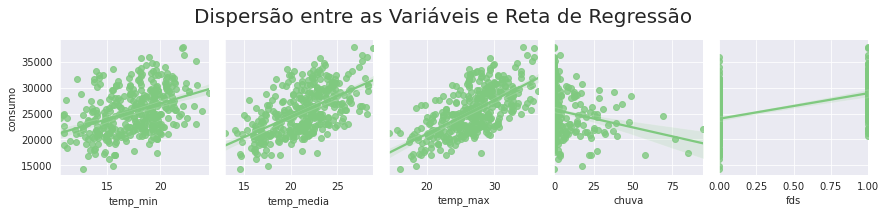

In [14]:
#estimando uma reta de regressão
ax = sns.pairplot(dados,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'],kind='reg') #selecionando apenas uma linha do pairplot
ax.fig.suptitle('Dispersão entre as Variáveis e Reta de Regressão',fontsize=20,y=1.15)
ax

#Forma alternativa de obter gráfico de correlação (JointPlot)

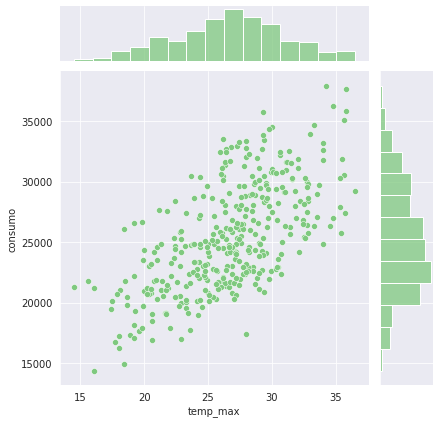

In [15]:
#seaborn.jointplot
ax = sns.jointplot(x='temp_max',y='consumo',data=dados)

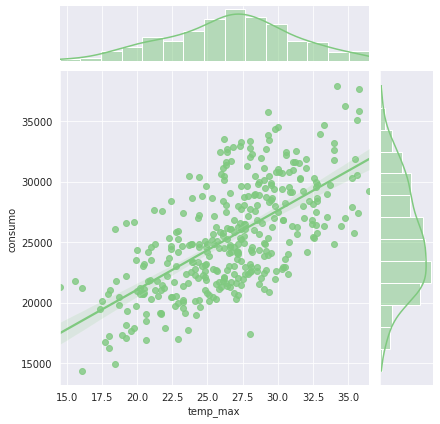

In [16]:
ax = sns.jointplot(x='temp_max',y='consumo',data=dados,kind='reg')

#Forma alternativa de obter gráfico de correlação (LmPlot)

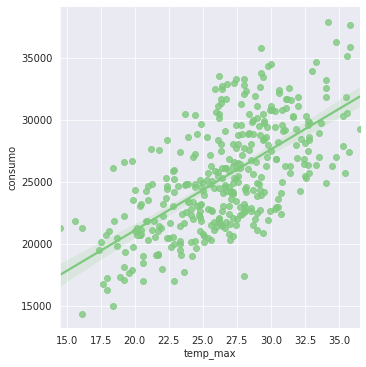

In [17]:
ax = sns.lmplot(x='temp_max',y='consumo',data=dados)

Text(0.5, 1.05, 'Reta de Regressão - Consumo X Temperatura X Final de Semana')

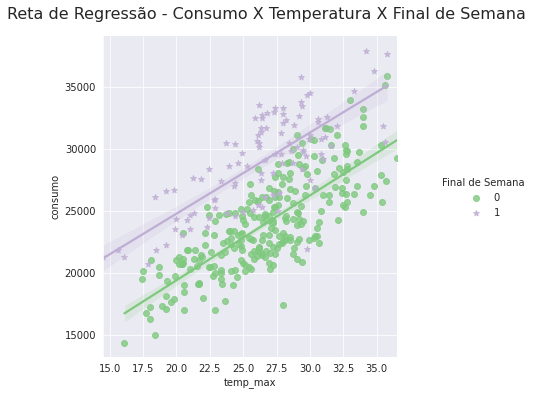

In [18]:
# a função lmplot() permite gerar dispersões entre duas variáveis, segundo uma terceira variável.
ax = sns.lmplot(x='temp_max',y='consumo',data=dados,hue='fds',markers=['o','*'],legend=False)
ax.add_legend(title='Final de Semana')
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana',fontsize=16,y=1.05)

Text(0.5, 1.05, 'Reta de Regressão - Consumo X Temperatura X Final de Semana')

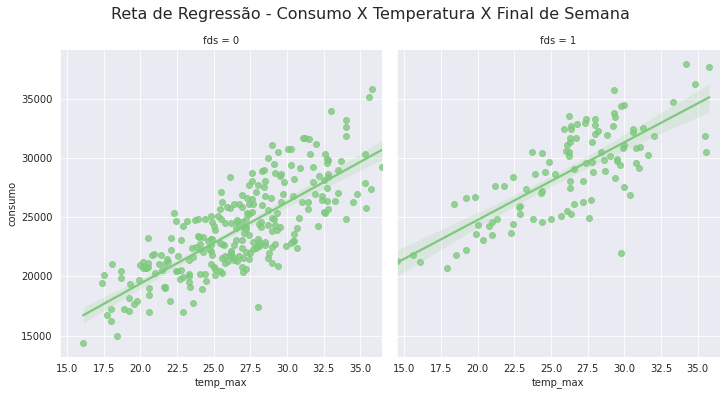

In [19]:
ax = sns.lmplot(x='temp_max',y='consumo',data=dados,col='fds')
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana',fontsize=16,y=1.05)

#Estimando um modelo de regressão linear para o consumo

In [20]:
from sklearn.model_selection import train_test_split

y = dados.consumo
X = dados[['temp_max','chuva','fds']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2811)

In [21]:
X_train.shape

(255, 3)

In [22]:
X_test.shape

(110, 3)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coeficiente de Determinação R², indica o quanto a linha de regressão ajusta os dados (entre 0 e 1)

In [24]:
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

R² = 0.73


#Obtendo Previsões

In [25]:
y_previsto = modelo.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


Previsões Pontuais

In [26]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [27]:
modelo.predict(entrada)[0]


26094.901775262017

#Simulador Simples

In [28]:
temp_max = 40
chuva = 0
fds= 1
entrada=[[temp_max,chuva,fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


#Entendo os coeficientes do modelos

In [29]:
modelo.intercept_ #valor médio do consumo de cerveja, fazendo todas as variáveis iguais a zero, onde intersepta o eixo y

5951.976339312445

In [30]:
type(modelo.intercept_)
#array numpy

numpy.float64

In [31]:
modelo.coef_ #temp_max, chuva, fds

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [32]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [33]:
index = ['Intercepto','Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']
pd.DataFrame(data = np.append(modelo.intercept_,modelo.coef_),index = index, columns=['Parâmetros'])
#np.append concatena dois arrays numpy

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


#Análise Gráficas das Previsões do Modelo

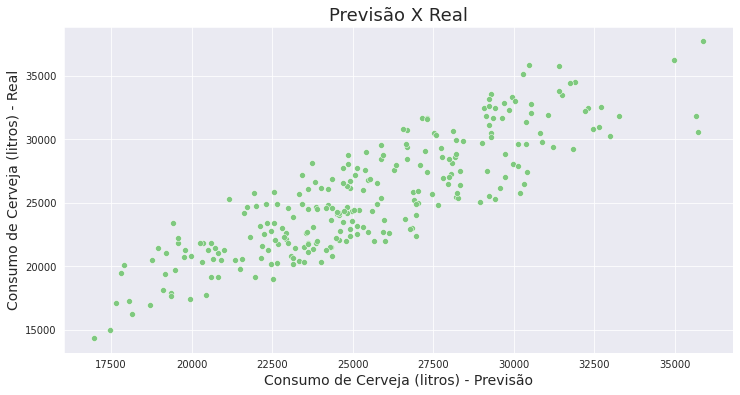

In [34]:
y_previsto_train = modelo.predict(X_train)

ax = sns.scatterplot(x=y_previsto_train,y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

### Resíduos (Erro)

Método informal de verificação da hipótese de variância constante dos resíduos

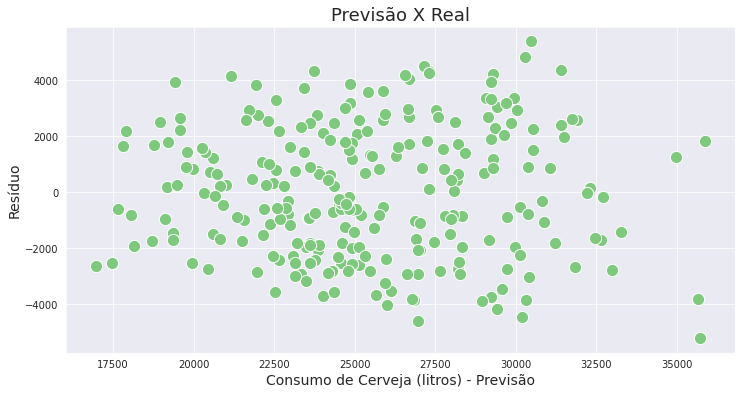

In [35]:
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x=y_previsto_train,y=residuo, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduo', fontsize=14)
ax

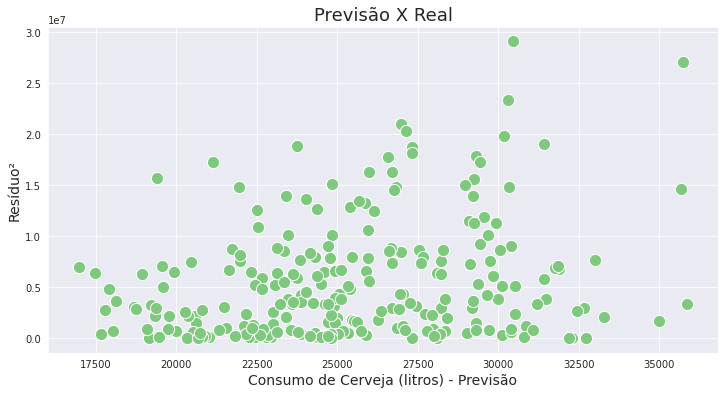

In [36]:
ax = sns.scatterplot(x=y_previsto_train,y=residuo**2, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduo²', fontsize=14)
ax

#indica que a variancia dos residuos não é constante

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


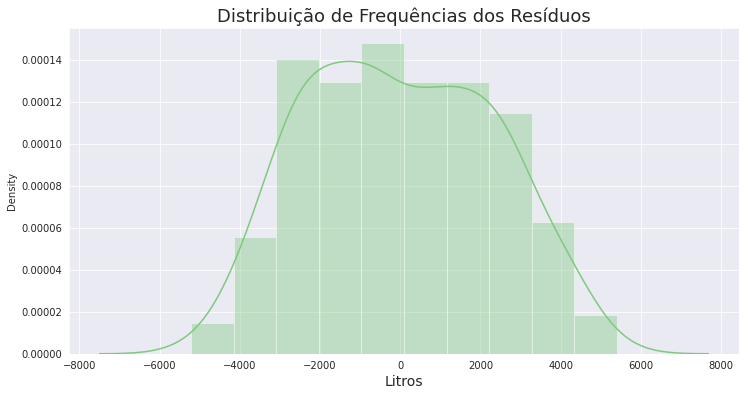

In [37]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax


#Comparando Modelos (Trocando as variáveis utilizadas)

Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatura Média

In [38]:
X2 = dados[['temp_media','chuva','fds']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.3,random_state=2811)
modelo_2 = LinearRegression()
modelo_2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Coeficiente de Determinação R², indica o quanto a linha de regressão ajusta os dados (entre 0 e 1)

In [39]:
print('Modelo com Temperatura Média')
print('R² = {}'.format(modelo_2.score(X2_train,y2_train).round(2)))

Modelo com Temperatura Média
R² = 0.66


In [40]:
print('Modelo com Temperatura Máxima')
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

Modelo com Temperatura Máxima
R² = 0.73


In [41]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [42]:
print('Modelo com Temperatura Média')
print('R² = {}'.format(metrics.r2_score(y2_test,y_previsto_2).round(2)))

Modelo com Temperatura Média
R² = 0.66


In [43]:
print('Modelo com Temperatura Média')
print('R² = {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))

Modelo com Temperatura Média
R² = 0.69


##Erro Quadrático Médio e Raiz do Erro Quadrático Médio (Objetivo é minimizar)

Temperatura Média

In [45]:
EQM_2 = metrics.mean_squared_error(y2_test,y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test,y_previsto_2).round(2)

pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM','REQM','R²'], columns=['Métricas'])



,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


Temperatura Máxima

In [46]:
EQM = metrics.mean_squared_error(y_test,y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
R2 = metrics.r2_score(y_test,y_previsto).round(2)

pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


#Salvando o Modelo (Biblioteca Pickle)

In [47]:
temp_max = 40
chuva = 0
fds= 1
entrada=[[temp_max,chuva,fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


In [48]:
import pickle 
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo,output) #output é o arquivo que queremos armazenar o modelo
output.close()

In [ ]:
#utilizar em outro arquivo para nao precisar rodar o modelo todas as vezes

# import pickle 
# modelo = open('modelo_consumo_cerveja','rb') #é necessario que o arquivo esteja na mesma pasta, ou passar o caminho correto
# lm_new = pickle.load(modelo)
# modelo.close()

# temp_max = 30.5
# chuva = 12.2
# fds=0
# entrada = [[temp_max,chuva,fds]]
# print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))

#Simulador Interativo

In [49]:
temp_max = 40
chuva = 0
fds= 1
entrada=[[temp_max,chuva,fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


In [64]:
from ipywidgets import widgets,HBox,VBox
from IPython.display import display

temp_max = widgets.Text(description='Temperatura Máxima')
chuva = widgets.Text(description='Quantidade de Chuva')
fds = widgets.Text(description='Final de Semana?')

botao = widgets.Button(description='Simular')

# left = VBox([temp_max,chuva])
# right = VBox([fds])
# inputs = HBox([left,right])

def simulador(sender):
  entrada=[[
            float(temp_max.value if temp_max.value else 0),
            float(chuva.value if chuva.value else 0),
            float(fds.value if fds.value else 0)

  ]]
  print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

botao.on_click(simulador)

In [65]:
display(inputs,botao)

Button(description='Simular', style=ButtonStyle())

5951.98 litros
